In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai import *
from fastai.vision import *



---


Let's see which all logos i am dealing with!

In [17]:
classes = ['jordan','nike','adidas','under armour']
classes

['jordan', 'nike', 'adidas', 'under armour']

In [18]:
path = Path("/content/drive/My Drive/logo_classifier")

path.ls()

[PosixPath('/content/drive/My Drive/logo_classifier/urls_adidas.txt'),
 PosixPath('/content/drive/My Drive/logo_classifier/urls_jordan.txt'),
 PosixPath('/content/drive/My Drive/logo_classifier/urls_nike.txt'),
 PosixPath('/content/drive/My Drive/logo_classifier/urls_under_armour.txt'),
 PosixPath('/content/drive/My Drive/logo_classifier/logo.jpg'),
 PosixPath('/content/drive/My Drive/logo_classifier/logo_classifier.ipynb'),
 PosixPath('/content/drive/My Drive/logo_classifier/jordan'),
 PosixPath('/content/drive/My Drive/logo_classifier/nike'),
 PosixPath('/content/drive/My Drive/logo_classifier/adidas'),
 PosixPath('/content/drive/My Drive/logo_classifier/under armour'),
 PosixPath('/content/drive/My Drive/logo_classifier/models')]



---


Downloading the images from google using the Kick@$$ method from fastai **'download_images()'** 

Ref: https://forums.fast.ai/t/datasets-downloading-images-for-multiple-classes/28560

In [5]:
for class_name in classes:
  folder = class_name
  file = f'urls_{class_name}.txt'.replace(' ','_')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images(path/file, dest, max_pics=150)
  print(file)

urls_under_armour.txt


In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [20]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
logo_classifier
  if getattr(ds, 'warn', False): warn(ds.warn)


In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['adidas', 'jordan', 'nike', 'under armour'], 4, 442, 109)

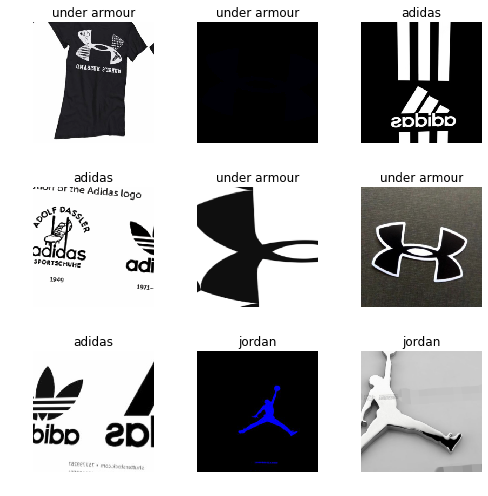

In [22]:
data.show_batch(rows=3, figsize=(7,7))

In [0]:
# We are using a CNN for this classifier ....cause its obvious its the best for Computer vision(as of now)
# And we are also implementing tranfer leaning
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [24]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.683866,1.149424,0.449541,00:09
1,1.325014,0.603712,0.211009,00:09
2,1.030116,0.486956,0.201835,00:09
3,0.811183,0.547228,0.183486,00:09
4,0.665744,0.512899,0.174312,00:09
5,0.567714,0.479811,0.174312,00:09
6,0.495849,0.483211,0.174312,00:09
7,0.437242,0.473806,0.165138,00:09
8,0.393634,0.467857,0.165138,00:09
9,0.356943,0.469147,0.174312,00:09


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


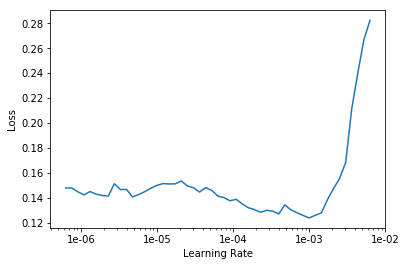

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(5, max_lr=slice(2e-4,4e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.158488,0.497541,0.155963,00:09
1,0.161657,0.601202,0.174312,00:09
2,0.157038,0.530727,0.137615,00:09
3,0.136375,0.428519,0.119266,00:09
4,0.118900,0.376087,0.119266,00:09


In [0]:
learn.save('stage-1')

In [29]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (442 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jordan,jordan,jordan,jordan,jordan
Path: /content/drive/My Drive/logo_classifier;

Valid: LabelList (109 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
under armour,jordan,nike,jordan,nike
Path: /content/drive/My Drive/logo_classifier;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): B

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

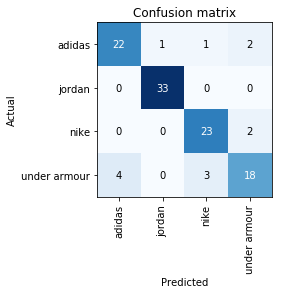

In [31]:
interp.plot_confusion_matrix()


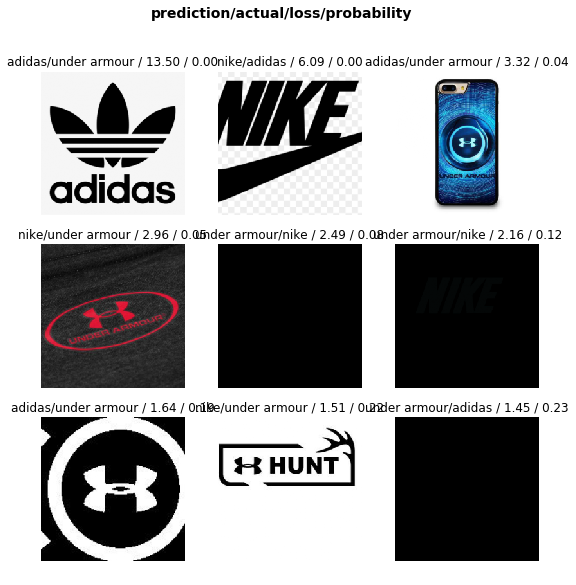

In [32]:
interp.plot_top_losses(9,figsize=(9,9))



---


You Can uncomment these two blocks if u are running this on Jupyter!

can uncover its functionality by urself

In [0]:
# from fastai.widgets import *

# losses,idxs = interp.top_losses()
# top_loss_paths = data.valid_ds.x[idxs]

In [0]:
# fd = FileDeleter(file_paths=top_loss_paths)

In [0]:
learn.export('logo_classifier.pkl')

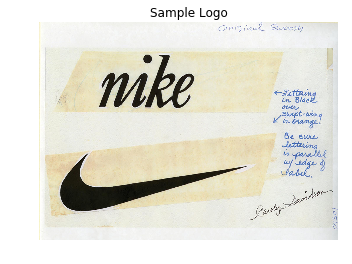

In [38]:
img = open_image(path/'logo.jpg')
img.show(figsize=(8, 4), title='Sample Logo')

In [0]:
learn = load_learner(path,'logo_classifier.pkl')

In [41]:
pred_class,pred_idx,outputs = learn.predict(img)
print(learn.predict(img))

print(f"The above logo is: {(learn.predict(img))[0]}")

(Category nike, tensor(2), tensor([2.0886e-05, 3.4104e-07, 9.9998e-01, 2.9590e-06]))
The above logo is: nike
